# Processing Science Images

In [1]:
import numpy as np
import astropy
import ccdproc
from ccdproc import CCDData, combiner
from astropy import units as u
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm 

# Bias

### <font color=purple> $\star$ Collecting and Loading the Bias frames 

In [2]:
# creating image list
images = ccdproc.ImageFileCollection(".")

# filtering the Bias images and adding them to a list 'bias_img'
##print(images.files_filtered(PICTTYPE = 2))
bias_img = (images.files_filtered(PICTTYPE = 2))

# printing list of the bias images
for fn in bias_img:
    print(fn)
    
# reading the bias images in ADU and defining them into list 'biases'
biases = [CCDData.read(fn, unit = "adu") for fn in bias_img]

Bias_-4.82C_00001677.fit
Bias_-4.82C_00001678.fit
Bias_-4.82C_00001679.fit
Bias_-4.82C_00001681.fit
Bias_-4.82C_00001682.fit
Bias_-4.82C_00001683.fit
Bias_-4.82C_00001684.fit
Bias_-4.82C_00001688.fit
Bias_-4.82C_00001691.fit
Bias_-4.82C_00001692.fit
Bias_-4.82C_00001722.fit
Bias_-4.82C_00001723.fit
Bias_-4.82C_00001724.fit
Bias_-4.82C_00001725.fit
Bias_-4.82C_00001726.fit
Bias_-4.82C_00001727.fit
Bias_-4.82C_00001728.fit
Bias_-4.82C_00001729.fit
Bias_-4.82C_00001730.fit
Bias_-4.82C_00001731.fit


### <font color=purple> $\star$ Statistic check for individual bias frames
#### <font color=purple> (checking the first frame)

In [3]:
print(biases) # prints list of pixel values for all the bias images
print(biases[0]) # prints the pixel values of the first bias image 
print(biases[0][:,0]) # print the counts of the first column of the first bias image

[CCDData([[129, 134, 118, ...,  99,  99,  91],
         [126, 136, 137, ...,  95, 101,  92],
         [127, 123, 134, ..., 100,  95, 100],
         ...,
         [127, 125, 118, ..., 100,  97, 102],
         [124, 137, 116, ..., 108,  89,  92],
         [124, 112, 125, ...,  94, 107, 104]]), CCDData([[138, 117, 142, ..., 111, 119, 105],
         [136, 150, 140, ..., 109, 121, 106],
         [139, 142, 135, ..., 109, 105, 100],
         ...,
         [152, 133, 144, ..., 100, 107, 106],
         [141, 124, 138, ..., 108, 121, 120],
         [137, 146, 128, ..., 105, 109, 102]]), CCDData([[135, 144, 133, ..., 103, 102, 111],
         [125, 132, 123, ..., 109,  97, 108],
         [122, 124, 144, ..., 101, 114,  98],
         ...,
         [129, 133, 138, ..., 111, 108, 114],
         [128, 133, 125, ..., 101,  93, 104],
         [121, 125, 144, ..., 113,  90, 106]]), CCDData([[135, 124, 115, ...,  98,  92,  97],
         [134, 130, 138, ..., 107,  95,  86],
         [131, 134, 116, ...,  

<font color=purple> Counts in ADU are quite small, not a lot of read out noise coming from the camera (compared to C14) 

#### <font color=purple> Minimum, Maximum, Mean pixel counts in ADU as well as the Standard deviation

In [4]:
print('Min:', np.min(biases[0]))
print('Max:', np.max(biases[0]))
print('Mean:', np.mean(biases[0]))
print('Standard Deviation:', np.std(biases[0]))

Min: 68
Max: 536
Mean: 103.90184544405997
Standard Deviation: 9.216543162955025


<font color=purple> 'Comment'

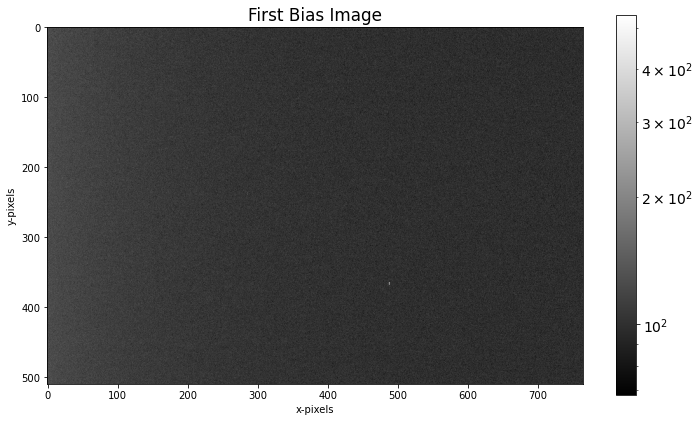

In [5]:
# displaying the first bias image
fig, ax = plt.subplots(figsize = (12,7))
plt.rcParams.update({'font.size':14 })

plt.imshow(biases[0], cmap='gray', norm=LogNorm())

plt.xlabel('x-pixels')
plt.ylabel('y-pixels')

plt.title('First Bias Image')
plt.colorbar()

<font color=purple> 'Comment'

### <font color=purple> $\star$ Combining the Bias frames

#### <font color=purple>Checking the stats for the combined bias frame

[[135.  129.  130.5 ... 102.5 104.  102.5]
 [129.5 133.  132.5 ... 105.  103.  104.5]
 [132.5 134.5 135.5 ... 106.  104.5 101.5]
 ...
 [127.  130.  130.  ... 106.5 104.  104.5]
 [131.5 131.5 129.  ... 104.5 102.5 106.5]
 [130.  129.5 127.5 ... 105.  105.  107. ]]
Min: 95.0
Max: 538.5
Mean: 109.07989875688838
Standard Deviation: 6.833298657276614


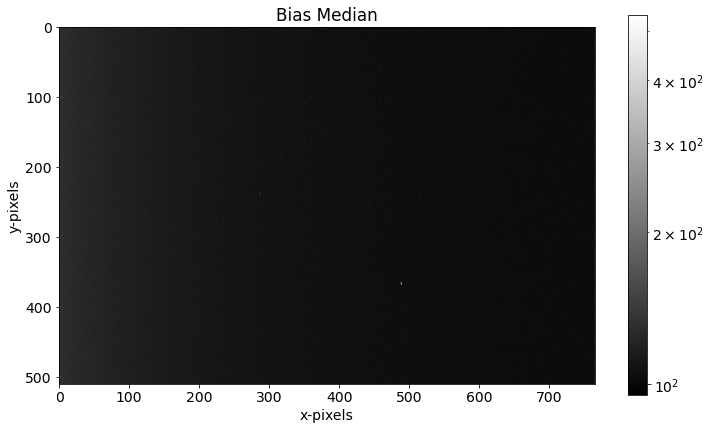

In [6]:
bias_median = ccdproc.Combiner(biases).median_combine()

# prints bias median counts
print(bias_median)

# prints count statistics for the bias median
print('Min:', np.min(bias_median))
print('Max:', np.max(bias_median))
print('Mean:', np.mean(bias_median))
print('Standard Deviation:', np.std(bias_median))

# displays the image for the Bias Median
fig, ax = plt.subplots(figsize = (12,7))

plt.rcParams.update({'font.size':14 })
plt.imshow(bias_median, cmap='gray', norm=LogNorm())
plt.xlabel('x-pixels')
plt.ylabel('y-pixels')
plt.title('Bias Median')
plt.colorbar()

### <font color=purple> $\star$ Creating Bias median frame

In [7]:
# header for bias median frame
bias_median.meta.update(EXPTIME = 0) # "add" exposure time "to header"
bias_median.meta.update(TELESCOP = 'C11') # "" telescope ""
bias_median.meta.update(OBJECT = 'Bias_Median') # "" image(object) type ""
print(bias_median.meta)

# creating bias_median.fits file
bias_median.write("bias_median.fits")

# removes the "biases" array
del(biases)

OrderedDict([('NCOMBINE', 20), ('EXPTIME', 0), ('TELESCOP', 'C11'), ('OBJECT', 'Bias_Median')])


# Dark

### <font color=purple> $\star$ Collecting and Loading the Dark frames 

In [8]:
images = ccdproc.ImageFileCollection(".",glob_include = 'Dark_600*')
for fn in images.files_filtered(PICTTYPE = 3):
    print(fn)

darks = [CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 3)]

Dark_600.000secs_-5.23C_00002340.fit
Dark_600.000secs_-5.23C_00002341.fit
Dark_600.000secs_-5.23C_00002342.fit
Dark_600.000secs_-5.23C_00002345.fit
Dark_600.000secs_-5.23C_00002346.fit
Dark_600.000secs_-5.23C_00002347.fit
Dark_600.000secs_-5.23C_00002349.fit
Dark_600.000secs_-5.23C_00002351.fit
Dark_600.000secs_-5.23C_00002353.fit
Dark_600.000secs_-5.23C_00002354.fit
Dark_600.000secs_-5.23C_00002355.fit
Dark_600.000secs_-5.23C_00002359.fit
Dark_600.000secs_-5.23C_00002360.fit
Dark_600.000secs_-5.23C_00002365.fit
Dark_600.000secs_-5.23C_00002367.fit
Dark_600.000secs_-5.23C_00002368.fit
Dark_600.000secs_-5.23C_00002369.fit
Dark_600.000secs_-5.23C_00002371.fit
Dark_600.000secs_-5.23C_00002377.fit
Dark_600.000secs_-5.23C_00002380.fit


#### <font color=purple> NOTE the Temperature!
<font color=purple> Science images and darks should have the same temperature within 0.5 degrees
- all Darks have the same temperature and exposure time

In [9]:
# displaying exposure time and temperature of the first dark frame
print("Exposure time of Darks: ", darks[0].header['EXPTIME'], "\n", "   Temperature of CCD: ", darks[0].header['CCD-TEMP'])

Exposure time of Darks:  600.0 
    Temperature of CCD:  -5.23215684598954


[CCDData([[145, 140, 145, ..., 111, 111, 120],
         [150, 141, 151, ..., 119, 117, 156],
         [132, 134, 153, ..., 117, 112, 124],
         ...,
         [186, 133, 146, ..., 113, 121, 114],
         [134, 139, 141, ..., 112, 117, 125],
         [154, 143, 143, ..., 119, 116, 118]]), CCDData([[133, 141, 135, ..., 119, 117, 109],
         [132, 143, 147, ..., 112, 109, 151],
         [138, 145, 137, ..., 112,  99, 101],
         ...,
         [188, 138, 129, ..., 130, 107, 104],
         [146, 143, 141, ..., 121, 109, 118],
         [122, 139, 132, ..., 113, 119, 109]]), CCDData([[130, 130, 132, ...,  97, 112, 111],
         [129, 124, 121, ..., 100, 107, 134],
         [122, 130, 133, ...,  94,  98, 106],
         ...,
         [170, 128, 144, ..., 111, 102, 109],
         [133, 145, 118, ..., 110, 115, 105],
         [140, 137, 125, ..., 114, 113, 112]]), CCDData([[138, 135, 142, ..., 109,  98, 102],
         [135, 132, 126, ..., 106, 101, 135],
         [142, 118, 132, ..., 1

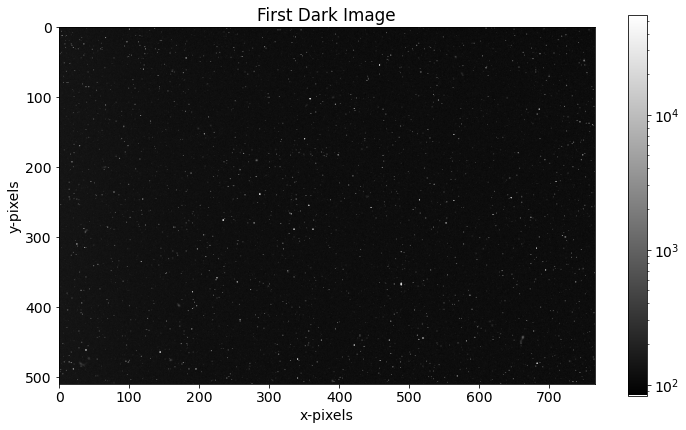

In [10]:
print(darks)
print(darks[0])
print(darks[0][:,0])

# stats for first frame
print('Min:', np.min(darks[0]))
print('Max:', np.max(darks[0]))
print('Mean:', np.mean(darks[0]))
print('Standard Deviation:', np.std(darks[0]))

#Displays the image for the first dark image
fig, ax = plt.subplots(figsize = (12,7))

plt.rcParams.update({'font.size':14 })
plt.imshow(darks[0], cmap='gray', norm=LogNorm())
plt.xlabel('x-pixels')
plt.ylabel('y-pixels')
plt.title('First Dark Image')
plt.colorbar()

### <font color=purple> $\star$ Subtracting the Bias from all the indiviual Dark exposures

In [11]:
# for loop which goes through each of the "darks" image and subtracts the "bias_median"
for idx, thisimage in enumerate(darks): 
    darks[idx] = ccdproc.subtract_bias(thisimage, bias_median)

#### <font color=purple>Checking if it was successful by printing the stats for the processed darks

[[  5.   24.   15.5 ...   6.5   4.    9.5]
 [ -4.5   5.   13.5 ...  -3.    2.   45.5]
 [ -3.5  23.5   3.5 ... -12.    0.5   5.5]
 ...
 [ 61.    5.   11.  ...  -2.5  16.   12.5]
 [ 12.5  13.5  10.  ...   6.5   5.5   1.5]
 [ 15.   11.5  15.5 ...  21.    5.   -4. ]]
Min: -61.0
Max: 54438.5
Mean: 15.976661540433167
Standard Deviation: 211.1369737476256


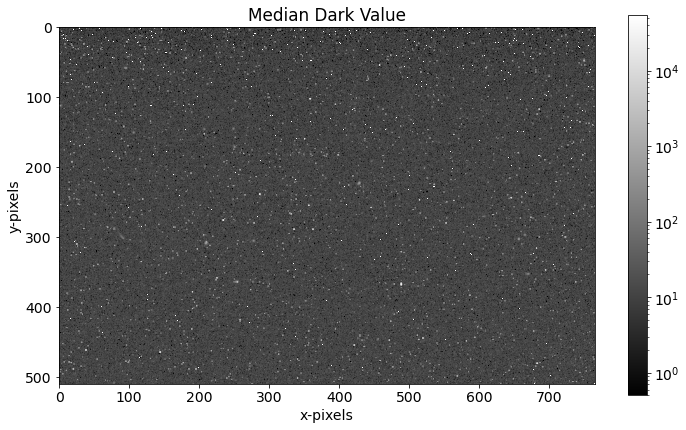

In [12]:
# Prints out the list (array) of pixel values for the median dark value
print(darks[idx])


#Prints the statistic counts for median dark value (min, max, mean and standard deviation)
print('Min:', np.min(darks[idx]))
print('Max:', np.max(darks[idx]))
print('Mean:', np.mean(darks[idx]))
print('Standard Deviation:', np.std(darks[idx]))

#Displays the image for the first median dark value image
fig, ax = plt.subplots(figsize = (12,7))

plt.rcParams.update({'font.size':14 })
plt.imshow(darks[idx], cmap='gray', norm=LogNorm())
plt.xlabel('x-pixels')
plt.ylabel('y-pixels')
plt.title('Median Dark Value')
plt.colorbar()

<font color=purple> 'Comment'

### <font color=purple> $\star$ Combining the processed Dark exposures

In [13]:
# combines the median dark value images together
dark_median = ccdproc.Combiner(darks).median_combine()

#### <font color=purple>Checking stats

[[ 0.   9.5  8.  ...  6.5  4.5  9.5]
 [ 6.   1.   0.5 ...  3.   5.  38.5]
 [ 3.   2.  -1.  ...  1.5  2.5  3.5]
 ...
 [55.   4.5  7.  ...  4.5  7.5  5. ]
 [ 8.5  6.   9.  ...  7.  10.   4.5]
 [ 7.   9.   6.5 ...  7.   5.5  6. ]]
Min: -72.0
Max: 54421.0
Mean: 12.662989875688838
Standard Deviation: 213.0894208707916


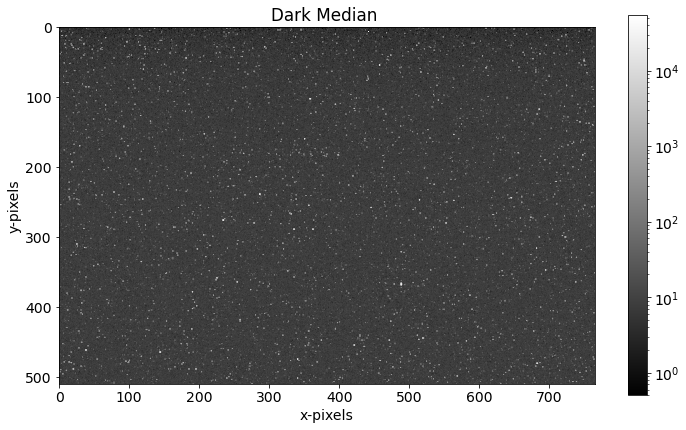

In [14]:
# Prints out the list (array) of pixel values for the dark median
print(dark_median)

#Prints the statistic counts for dark median (min, max, mean and standard deviation)
print('Min:', np.min(dark_median))
print('Max:', np.max(dark_median))
print('Mean:', np.mean(dark_median))
print('Standard Deviation:', np.std(dark_median))

#Displays the image for the dark median image
fig, ax = plt.subplots(figsize = (12,7))

plt.rcParams.update({'font.size':14 })
plt.imshow(dark_median, cmap='gray', norm=LogNorm())
plt.xlabel('x-pixels')
plt.ylabel('y-pixels')
plt.title('Dark Median ')
plt.colorbar()

### <font color=purple> $\star$ Creating Dark median frame

In [15]:
# header for the Dark Median frame
dark_median.meta.update(EXPTIME = 600) # exposure time
dark_median.meta.update(TELESCOP = 'C11') # telescope
dark_median.meta.update(OBJECT = 'Dark_Median') # image(object) type
print(dark_median.meta)

# creating dark_median.fits file
dark_median.write("dark_median.fits")

OrderedDict([('NCOMBINE', 20), ('EXPTIME', 600), ('TELESCOP', 'C11'), ('OBJECT', 'Dark_Median')])


Notes:
~ Consider dust making objects fainter and redder.
~ Generate isochrones for ages with red giants (10^9 to 10^10 years)

~ Use 10 minutes or 600sec darks... ~10 to 20 darks
~ Science images and darks should have the same temperature within 0.5 degrees

Fact Sheet
~ Information about our object!